LAB 5: BÀI TẬP TỔNG HỢP

1.Mô tả dữ liệu bằng các giá trị số:

In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew, kurtosis

Bước 1: Tính các đại lượng thống kê cho hai tập dữ liệu

In [426]:
# Đọc file dữ liệu
file_path = r'D:\DataAnalyst\Bài tập tổng hợp\babies.txt'
data = pd.read_csv(file_path, delim_whitespace=True)
data.to_csv('babies.csv')
data.head(10)

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1
5,136,0
6,138,0
7,132,0
8,120,0
9,143,1


- Sử dụng hàm "to_csv()" để chuyển file dữ liệu từ txt thành csv.
- Sử dụng phương thức "delim_whitespace=True" khi các giá trị trong tệp CSV của bạn được phân tách bằng khoảng trắng thay vì dấu phẩy hoặc các ký tự khác.

In [427]:
# Tạo 2 biến khai báo dữ liệu
smoke_data = data[data['smoke'] == 1]['bwt']
no_smoke_data = data[data['smoke'] == 0]['bwt']

- 1: Có hút thuốc
- 0: Không hút thuốc

In [428]:
# Viết hàm tính toán
def calculate_statistics(data):
    statistics = {
        'Count': len(data),
        'Min': int(data.min()),
        'Max': int(data.max()),
        'Mean': round(data.mean()),
        'Std': round(data.std()),
        'Var': round(data.var()),
        'Median': int(data.median()),
        'Quantile 0%': int(data.quantile(0)),
        'Quantile 25%': int(data.quantile(0.25)),
        'Quantile 50%': int(data.quantile(0.5)),
        'Quantile 75%': int(data.quantile(0.75)),
        'IQR': int(data.quantile(0.75) - data.quantile(0.25)),
        'Skewness': round(skew(data), 2),
        'Kurtosis': round(kurtosis(data), 2)
    }
    return statistics

smoke_stats = calculate_statistics(smoke_data)
no_smoke_stats = calculate_statistics(no_smoke_data)

stats_df = pd.DataFrame({
    'TH1: Bà mẹ hút thuốc': smoke_stats,
    'TH2: Bà mẹ không hút thuốc': no_smoke_stats
})

print(stats_df)


              TH1: Bà mẹ hút thuốc  TH2: Bà mẹ không hút thuốc
Count                       484.00                      742.00
Min                          58.00                       55.00
Max                         163.00                      176.00
Mean                        114.00                      123.00
Std                          18.00                       17.00
Var                         328.00                      303.00
Median                      115.00                      123.00
Quantile 0%                  58.00                       55.00
Quantile 25%                102.00                      113.00
Quantile 50%                115.00                      123.00
Quantile 75%                126.00                      134.00
IQR                          24.00                       21.00
Skewness                     -0.03                       -0.19
Kurtosis                     -0.01                        1.04


Bước 2: Phân tích dữ liệu dựa trên các đại lượng vừa tính.

2. Xét tập dữ liệu ứng với trƣờng hợp bà mẹ không hút thuốc

In [429]:
print("\nAnalysis for mothers who do not smoke:")
print(f"Count: {no_smoke_stats['Count']}")
print(f"Min: {no_smoke_stats['Min']}")
print(f"Max: {no_smoke_stats['Max']}")
print(f"Mean: {no_smoke_stats['Mean']}")
print(f"Std: {no_smoke_stats['Std']}")
print(f"Var: {no_smoke_stats['Var']}")
print(f"Median: {no_smoke_stats['Median']}")
print(f"Quantile 0%: {no_smoke_stats['Quantile 0%']}")
print(f"Quantile 25%: {no_smoke_stats['Quantile 25%']}")
print(f"Quantile 50%: {no_smoke_stats['Quantile 50%']}")
print(f"Quantile 75%: {no_smoke_stats['Quantile 75%']}")
print(f"IQR: {no_smoke_stats['IQR']}")
print(f"Skewness: {no_smoke_stats['Skewness']}")
print(f"Kurtosis: {no_smoke_stats['Kurtosis']}")

# Interpretations:
print("\nInterpretation:")
print("- Vị trí tập trung của dữ liệu: khoảng giá trị: 123")
print("- Tính biến động của dữ liệu:")
print(f"+, Phương sai (variance): {no_smoke_stats['Var']}")
print(f"+, Độ lệch chuẩn (standard deviation): {no_smoke_stats['Std']}")
print(f"+, Khoảng giá trị: min={no_smoke_stats['Min']}, max={no_smoke_stats['Max']} -> range={no_smoke_stats['Max'] - no_smoke_stats['Min']}")
print(f"+, Khoảng cách giữa 2 phần tƣ vị: IQR=Q3-Q1={no_smoke_stats['Quantile 75%']}-{no_smoke_stats['Quantile 25%']}={no_smoke_stats['IQR']}")
print("=> Nhận xét: Như vậy dữ liệu phân bố gần nhau.")
print("- Hình dạng phân bố của dữ liệu:")
print(f"+, Độ lệch: Skewness={no_smoke_stats['Skewness']}")
print(f"+, Độ bè nhọn của đỉnh dữ liệu: Kurtosis={no_smoke_stats['Kurtosis']}")
print("=> Nhận xét: Nhƣ vậy dữ liệu hơi lệch về phía trái, và đỉnh nhọn, hai bên giảm với tốc độ vừa phải.")



Analysis for mothers who do not smoke:
Count: 742
Min: 55
Max: 176
Mean: 123
Std: 17
Var: 303
Median: 123
Quantile 0%: 55
Quantile 25%: 113
Quantile 50%: 123
Quantile 75%: 134
IQR: 21
Skewness: -0.19
Kurtosis: 1.04

Interpretation:
- Vị trí tập trung của dữ liệu: khoảng giá trị: 123
- Tính biến động của dữ liệu:
+, Phương sai (variance): 303
+, Độ lệch chuẩn (standard deviation): 17
+, Khoảng giá trị: min=55, max=176 -> range=121
+, Khoảng cách giữa 2 phần tƣ vị: IQR=Q3-Q1=134-113=21
=> Nhận xét: Như vậy dữ liệu phân bố gần nhau.
- Hình dạng phân bố của dữ liệu:
+, Độ lệch: Skewness=-0.19
+, Độ bè nhọn của đỉnh dữ liệu: Kurtosis=1.04
=> Nhận xét: Nhƣ vậy dữ liệu hơi lệch về phía trái, và đỉnh nhọn, hai bên giảm với tốc độ vừa phải.


2.Biểu diễn hình học của dữ liệu

1. Dữ liệu cân nặng của trẻ trong trƣờng hợp bà mẹ hút thuốc và bà mẹ không hút thuốc. Ta sẽ phân tích các biểu đồ:

a) Histogram trong trường hợp bà mẹ có hút thuốc:

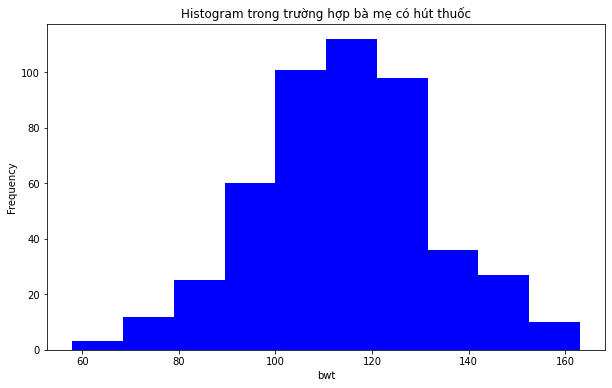

In [430]:
# Biểu diễn bằng biểu đồ Histogram với trường hợp là các bà mẹ có hút thuốc
df_smoke = data[data['smoke'] == 1]
df_no_smoke = data[data['smoke'] == 0]
plt.figure(figsize=(10,6))
plt.hist(df_smoke["bwt"], color='blue')
plt.title("Histogram trong trường hợp bà mẹ có hút thuốc")
plt.xlabel("bwt")
plt.ylabel("Frequency")
plt.show()

- Vị trí tập trung dữ liệu: khoảng 110

- Tính biến động của dữ liệu: dữ liệu phân bố trong khoảng [50-170]

- Tính đối xứng của phân bố dữ liệu: dữ liệu chỉ có 1 đỉnh. Bắt đầu từ đỉnh, hai bên giảm dần và tốc độ giảm vừa phải. Dữ liệu phân bố gần đối xứng, hơi lệch về phía trái. Hai bên đuôi có độ dài vừa phải. Hai bên đỉnh dữ liệu cũng phân bố vừa phải.

- Giá trị ngoại lệ: không thấy rõ có giá trị ngoại lệ nào đáng kể

b) Boxplot trong trường hợp bà mẹ có hút thuốc

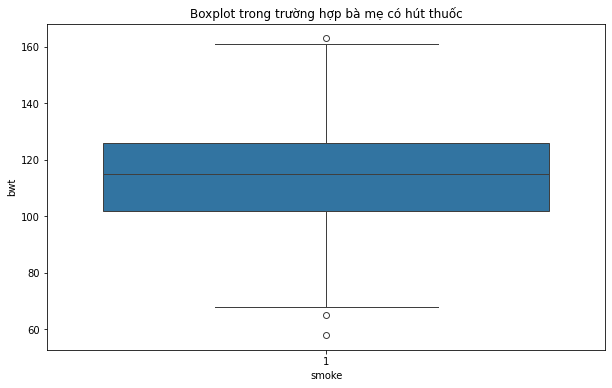

In [431]:
# Sử dụng thư viện seaborn để biểu biễn dữ liệu trong trường hợp bà mẹ có hút thuốc bằng biểu đồ boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoke', y='bwt', data=df_smoke)
plt.title('Boxplot trong trường hợp bà mẹ có hút thuốc')
plt.show()

2. Dữ liệu cân nặng của trẻ trong trường hợp bà mẹ hút thuốc không hút thuốc

So sánh hai tập dữ liệu dựa vào các biểu diễn hình học:

a) Histogram

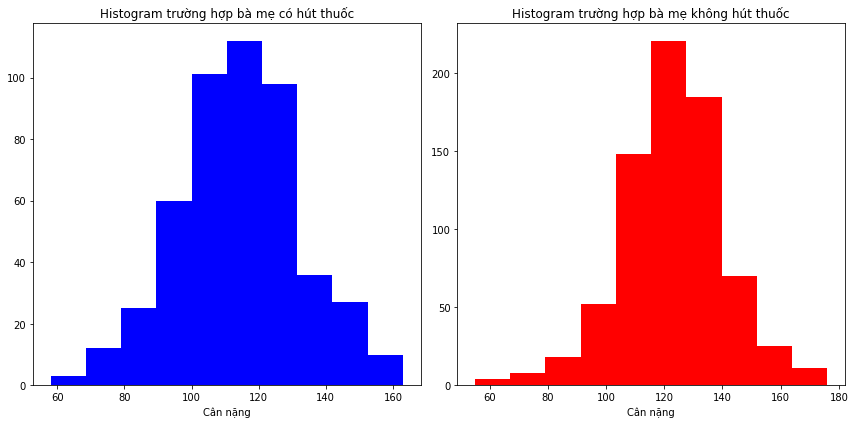

In [438]:
# Hiển thị dữ liệu trường hợp có hút thuốc dự trên cân nặng bằng biểu đồ Histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_smoke['bwt'], color='blue')
plt.title('Histogram trường hợp bà mẹ có hút thuốc')
plt.xlabel('Cân nặng')

# Hiển thị dữ liệu trường hợp không hút thuốc dự trên cân nặng bằng biểu đồ Histogram
plt.subplot(1, 2, 2)
plt.hist(df_no_smoke['bwt'], color='red')
plt.title('Histogram trường hợp bà mẹ không hút thuốc')
plt.xlabel('Cân nặng')

plt.tight_layout()
plt.show()

- Cân nặng của trẻ trẻ trong trường hợp bà mẹ không hút thuốc cáo hơn so với trường hợp bà mẹ có hút thuốc 
- Tính biến thiên của 2 tập dữ liệu: tương tự nhau
- Tính đối xứng của 2 tập dữ liệu: tương tự nhau
- Giá trị ngoại lệ: cả 2 đều không có giá trị ngoại lệ đáng chú ý.

b) Boxplot

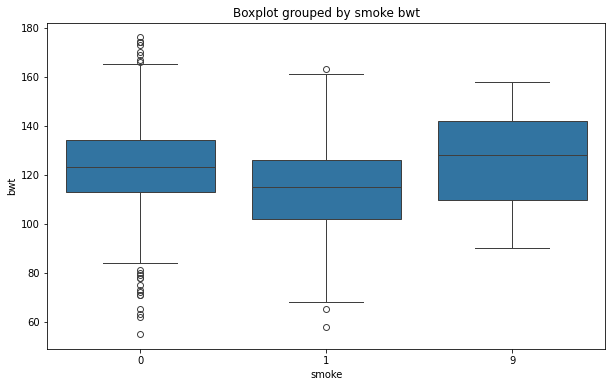

In [436]:
# Sử dụng thư viện seaborn để hiển thị dữ liệu bằng biểu đồ boxplot với cả 2 trường hợp là có hút thuốc và không hút thuốc
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoke', y='bwt', data=data)
plt.title('Boxplot grouped by smoke bwt')
plt.show()

- Khác biệt về vị trí: giá trị trung vị của trường hợp bà mẹ không hút thuốc lớn hơn trường hợp bà mẹ có hút thuốc (123 và 115). (Trường hợp smoke=9 là trường hợp không biết bà mẹ có hút thuốc hay không, trung vị trong trường hợp này cao hơn so với 2 trường hợp bà mẹ có hút 
thuốc và không hút thuốc).

- Giá trị ngoại lệ: cả 2 trường hợp đều có giá trị ngoại lệ trên và dưới. Trường hợp không hút thuốc có nhiều giá trị ngoại lệ hơn.

So sánh QQ-plot phân bố của 2 tập dữ liệu:

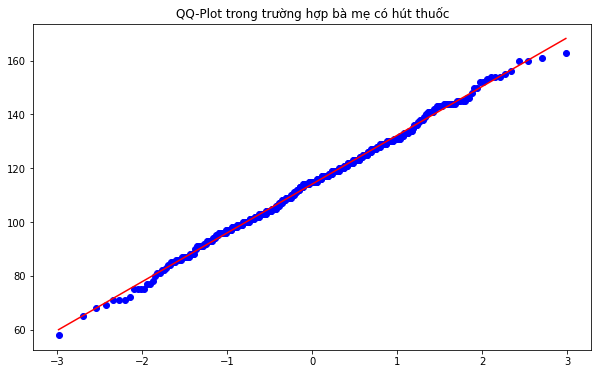

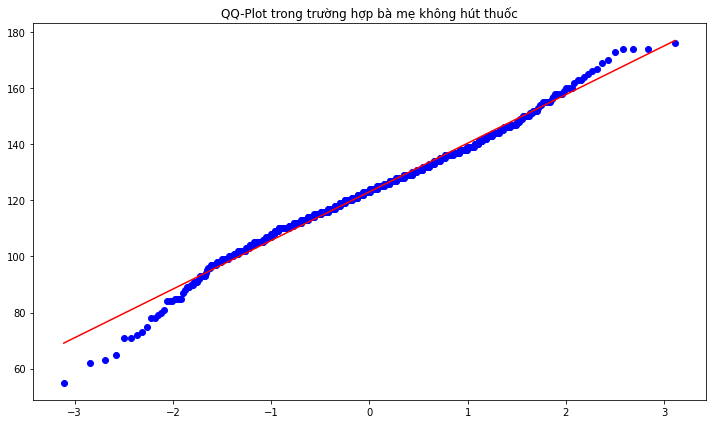

In [437]:
# Biểu diễn bằng biểu đồ QQ-plot với dữ liệu là các bà mẹ hút thuốc và bà mẹ không hút thuốc
plt.figure(figsize=(10, 6))
stats.probplot(df_smoke['bwt'], dist="norm", plot=plt)
plt.title('QQ-Plot trong trường hợp bà mẹ có hút thuốc')
plt.xlabel('')
plt.ylabel('')


plt.figure(figsize=(10, 6))
stats.probplot(df_no_smoke['bwt'], dist="norm", plot=plt)
plt.title('QQ-Plot trong trường hợp bà mẹ không hút thuốc')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.show()

QQ-plot có dạng đường thẳng, suy ra dữ liệu của 2 trường hợp có phân bố tương tự nhau.